In [34]:
import numpy as np
from keras import layers, models
from keras import datasets
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import keras

In [35]:
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()


In [36]:
X_orig = X_test.copy()
y_orig = y_test.copy()

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#pyplot 한글설정
import matplotlib
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)


In [39]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('정확도')
    plt.xlabel('에포크')
    plt.legend(['학습 데이터 성능', '검증 데이터 성능'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('손실')
    plt.xlabel('에포크')
    plt.legend(['학습 데이터 성능', '검증 데이터 성능'], loc=0)
    # plt.show()


In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, input_shape=(13,), activation='relu'))
model.add(keras.layers.Dense(1))

In [41]:
model.compile('sgd', loss='mse')

In [42]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 562.4421 - val_loss: 528.2964
Epoch 2/100
 - 0s - loss: 352.0744 - val_loss: 119.0625
Epoch 3/100
 - 0s - loss: 115.9785 - val_loss: 100.0122
Epoch 4/100
 - 0s - loss: 79.8496 - val_loss: 75.8023
Epoch 5/100
 - 0s - loss: 65.7406 - val_loss: 109.4788
Epoch 6/100
 - 0s - loss: 63.0938 - val_loss: 62.4258
Epoch 7/100
 - 0s - loss: 50.0930 - val_loss: 57.7582
Epoch 8/100
 - 0s - loss: 46.7168 - val_loss: 49.6342
Epoch 9/100
 - 0s - loss: 47.9048 - val_loss: 93.5267
Epoch 10/100
 - 0s - loss: 47.7704 - val_loss: 44.9786
Epoch 11/100
 - 0s - loss: 51.6211 - val_loss: 43.9471
Epoch 12/100
 - 0s - loss: 40.3382 - val_loss: 43.2036
Epoch 13/100
 - 0s - loss: 37.4653 - val_loss: 43.9018
Epoch 14/100
 - 0s - loss: 42.9087 - val_loss: 42.8577
Epoch 15/100
 - 0s - loss: 47.4582 - val_loss: 35.9764
Epoch 16/100
 - 0s - loss: 42.7042 - val_loss: 35.9589
Epoch 17/100
 - 0s - loss: 38.4909 - val_loss: 34.0580
Epoch 18/100
 - 0s - l

In [43]:
perfomance_test = model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 121us/step


In [44]:
perfomance_test   #Returns the loss value

21.151956595626533

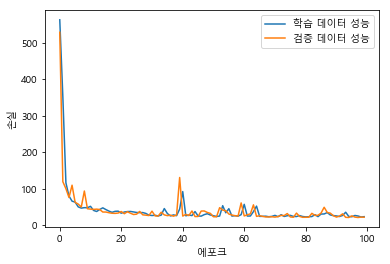

In [45]:
plot_loss(history)